In [3]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 41.6 MB/s eta 0:00:00


In [4]:
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 41.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [5]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.7 MB/s eta 0:00:00


In [6]:
!pip install descriptastorus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.1 MB/s eta 0:00:00


In [7]:
!pip install scipy==1.9.0 #probably, you will need to restart the notebook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.8.1
    Uninstalling scipy-1.8.1:
      Successfully uninstalled scipy-1.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
deepchem 2.7.1 requires scipy<1.9, but you have scipy 1.9.0 which is incompatible.


In [1]:
!pip install molvs

  Using cached MolVS-0.1.1-py3-none-any.whl


In [2]:
!pip install loguru

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.1 MB/s eta 0:00:00


# Imports

In [84]:
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from loguru import logger
print('scipy', scipy.__version__)
import pandas as pd
import scipy.stats as stats
import numpy as np
import pytest
import torch
import deepchem as dc
from molvs.tautomer import TautomerCanonicalizer
from deepchem.models import GCNModel
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import IPythonConsole
from descriptastorus.descriptors import rdNormalizedDescriptors
from sklearn.preprocessing import FunctionTransformer
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
from typing import Optional
from pathlib import Path
from tqdm import tqdm
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
import matplotlib.pyplot as plt

scipy 1.9.0


# Визуализация данных

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [149]:
data_small = pd.read_excel('/content/drive/MyDrive/atomic_hack_dataset_1400.xlsx').drop(['Pictures', 'Title'], axis=1)
data_big = pd.read_excel('/content/drive/MyDrive/atomick_hack_dataset_35000.xlsx', usecols=[1, 2, 3])

In [150]:
data_big = data_big.rename(columns={k: k.lower() for k in data_big.columns})

In [151]:
data_big.head()

,title,ic50,smiles
0,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


In [152]:
data_small = data_small.rename(columns={
    'IC50, mmg/ml': 'IC50',
    'CC50-MDCK, mmg/ml': 'CC50'
})

rename_dict = {k: k.lower().replace(' ', '_') for k in data_small.columns} #заменяем имена на нижний регистр + подчеркивания вместо пробелов

data_small = data_small.rename(columns=rename_dict)

In [153]:
data_small.si = data_small.cc50 / data_small.ic50

In [154]:
data_small.head()

,ic50,cc50,si,molecular_weight,hydrogen_bond_acceptors,hydrogen_bond_donors,polar_sa,smiles
0,2.7,500.0,185.185185,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2
1,0.7,447.0,638.571429,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2
2,9.9,144.0,14.545455,250.431,1,0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2
3,8.3,500.0,60.240964,222.377,1,0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2
4,39.4,143.0,3.629442,239.361,2,0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C


In [155]:
data_small.isna().sum()

ic50                       0
cc50                       0
si                         0
molecular_weight           0
hydrogen_bond_acceptors    0
hydrogen_bond_donors       0
polar_sa                   0
smiles                     0
dtype: int64

In [156]:
def fp_from_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) # generate MF as bit vector
    fp = np.frombuffer(fp.ToBitString().encode(), 'u1') - ord('0') # convert bit vector to 1d numpy array
    return fp

In [157]:
smiles = data_small.smiles
smiles.values

array(['OCC\\N=C(\\[C@]12C)C[C@@H](C1(C)C)CC2',
       'OCC\\N=C(\\[C@]12C)C[C@@H](C1(C)C)CC2',
       'CCN(CC)CC\\N=C(\\[C@@]12C)C[C@H](C1(C)C)CC2', ...,
       'COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])=O)ccc3Oc(cc4)ccc4N',
       'c1ccc(C([O-])=O)c(c1C([O-])=O)-c(c2)ccc(c23)cc(cc3)OC',
       'CCC(CC)O[C@H](C=C1C(=O)O)[C@H](NC(=O)C)[C@H](C1)Nc(c2N)nccc2'],
      dtype=object)

In [158]:
smiles = data_small.smiles

In [160]:
def rdnd_from_smiles(smiles):
    generator = rdNormalizedDescriptors.RDKit2DNormalized()
    rdnd = generator.process(smiles)
    return rdnd

In [161]:
print(len(rdnd_from_smiles(smiles.values[0])))
rdnd_from_smiles(smiles.values[0])[:10]

201


[True,
 0.8754327918263595,
 0.017603958406344076,
 0.023177705686181632,
 0.06008754340089175,
 0.04237235987084565,
 0.019195921730730512,
 0.08078504947531846,
 0.052917612268539777,
 0.2706689441604768]

In [162]:
def tsne_df(chem_rep_list):
    pca_50 = PCA(n_components=50)
    pca_result_50 = pca_50.fit_transform(chem_rep_list)
    pca_50_variance = pca_50.explained_variance_ratio_
    tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(pca_result_50)
    return pd.DataFrame(tsne_results, columns=["Component 1", "Component 2"])

In [163]:
def pca_df(chem_rep_list):
    pca = PCA(n_components=2)
    pca_arr = pca.fit_transform(chem_rep_list)
    return pd.DataFrame(pca_arr, columns=["Component 1", "Component 2"])

In [164]:
def graph_chemical_space(
    df: pd.DataFrame,
    smiles_col: str = "SMILES",
    color_col: str = None,
    id_col: str = None,
    chem_rep: str = "rdkit",
    dim_reduction: str = "TSNE",
    graph_title: str = None
):
    """
    Written by Melissa Du, Oloren AI
    df : pandas.DataFrame object
        a pandas dataframe that contains the data plotted in fig.
    smiles_col : str, optional
        name of the column in df containing the smiles plotted in fig (default 'SMILES').
        If provided as a list, will add a slider to choose which column is used for rendering the structures.
    color_col : str, optional
        name of the column in df that will specify the point colors plotted in fig (default None)
    id_col : str, optional
        name of the column in df that will specify id of the points plotted in fig (default None)
    chem_rep : "rdkit" | "mf" | "oc" , optional
        name of the desired chemical representation
    dim_reduction : "PCA" | "TSNE" , optional
        name of desired dimension reduction technique
    graph_title : str, optional
        title of graph
    """

    assert chem_rep in ['rdkit', 'mf', 'oc'], "Please enter a valid chemical representation"
    assert dim_reduction in ["PCA", "TSNE"], "Please enter a valid dimension reduction technique"
    assert smiles_col in df, "The specified smiles_col is not in the dataframe"

    funcs = {
        "rdkit" : rdnd_from_smiles,
        "mf" : fp_from_smiles,
        "TSNE": tsne_df,
        "PCA": pca_df
    }

    mol_list = []
    # convert smiles to desired chemical representation
    for smiles in df[smiles_col]:
        mol_list.append(funcs[chem_rep](smiles))
    # apply desired dimension reduction technique
    rd_df = funcs[dim_reduction](mol_list)
    # populate dataframe with color and id columns
    rd_df = rd_df.join(df[smiles_col])
    if id_col is not None:
        rd_df = rd_df.join(df[id_col])
    if color_col is not None:
        rd_df = rd_df.join(df[color_col])

    fig = px.scatter(rd_df, x='Component 1', y='Component 2', color=color_col, title=graph_title)
    return fig

In [165]:
data_small.describe()

,ic50,cc50,si,molecular_weight,hydrogen_bond_acceptors,hydrogen_bond_donors,polar_sa
count,1468.000000,1468.000000,1.468000e+03,1468.000000,1468.000000,1468.000000,1468.000000
mean,50.277063,186.491530,2.210854e+04,384.739636,3.831744,1.333787,81.273215
std,92.184768,1009.454293,4.771268e+05,153.164268,2.860473,1.803663,54.078778
min,0.000010,0.031928,3.616134e-02,110.157000,0.000000,0.000000,0.000000
25%,2.500000,30.375000,1.833333e+00,283.049250,2.000000,0.000000,39.440000
50%,10.100000,90.400000,5.528073e+00,349.371000,3.000000,1.000000,71.840000
75%,49.450000,300.000000,2.778741e+01,446.508000,5.000000,2.000000,106.160000
max,1000.000000,37646.000000,1.632222e+07,1159.380000,19.000000,11.000000,319.510000


In [135]:
data_big.describe()

,ic50
count,36377.000000
mean,7.813503
std,48.489710
min,0.000010
25%,1.696000
50%,3.635000
75%,5.934000
max,3183.600000


In [137]:
data_small_clear_ic50 = data_small[data_small.ic50 < 100]
data_big_clear_ic50 = data_big[data_big.ic50 < 100]

In [147]:
data_small_clear_ic50.dtypes

title                       object
ic50                       float64
cc50                       float64
si                         float64
molecular_weight           float64
hydrogen_bond_acceptors      int64
hydrogen_bond_donors         int64
polar_sa                   float64
smiles                      object
dtype: object

In [142]:
data_small_clear_cc50 = data_small[data_small.cc50 < 250]

In [198]:
data_small_clear_si = data_small[data_small.si < 30]

In [199]:
print(len(data_small_clear_ic50), len(data_small_clear_cc50), len(data_big_clear_ic50), len(data_small_clear_si))

1241 1010 36041 1119


In [200]:
graph_chemical_space(data_small_clear_si, smiles_col='smiles', color_col='si', id_col=None, chem_rep='mf', dim_reduction='PCA', graph_title='Morgan Fingerprint + PCA (small_dataset) SI')

In [167]:
graph_chemical_space(data_small_clear_ic50, smiles_col='smiles', color_col='ic50', id_col=None, chem_rep='mf', dim_reduction='PCA', graph_title='Morgan Fingerprint + PCA (small_dataset) IC50')

[19:58:12] Conflicting single bond directions around double bond at index 55.
[19:58:12]   BondStereo set to STEREONONE and single bond directions set to NONE.


In [168]:
graph_chemical_space(data_small_clear_cc50, smiles_col='smiles', color_col='cc50', id_col=None, chem_rep='mf', dim_reduction='PCA', graph_title='Morgan Fingerprint + PCA (small_dataset) CC50')

[19:58:14] Conflicting single bond directions around double bond at index 55.
[19:58:14]   BondStereo set to STEREONONE and single bond directions set to NONE.


In [171]:
graph_chemical_space(data_big_clear_ic50, smiles_col='smiles', color_col='ic50', id_col=None, chem_rep='mf', dim_reduction='PCA', graph_title='Morgan Fingerprint + PCA (big_dataset) IC50')

[20:02:12] Conflicting single bond directions around double bond at index 55.
[20:02:12]   BondStereo set to STEREONONE and single bond directions set to NONE.
[20:02:23] Conflicting single bond directions around double bond at index 7.
[20:02:23]   BondStereo set to STEREONONE and single bond directions set to NONE.


In [106]:
graph_chemical_space(data_big_clear_ic50, smiles_col='smiles', color_col='ic50', id_col=None, chem_rep='mf', dim_reduction='PCA', graph_title='Morgan Fingerprint + PCA (big_dataset)')

[18:54:53] Conflicting single bond directions around double bond at index 55.
[18:54:53]   BondStereo set to STEREONONE and single bond directions set to NONE.
[18:55:06] Conflicting single bond directions around double bond at index 7.
[18:55:06]   BondStereo set to STEREONONE and single bond directions set to NONE.


# попытка сделать GCN

## обработка выбросов

In [6]:
data_1 = pd.read_excel('/content/drive/MyDrive/atomic_hack_dataset_1400.xlsx', usecols=[1, 8])
data_2 = pd.read_excel('/content/drive/MyDrive/atomick_hack_dataset_35000.xlsx', usecols=[2, 3])

In [7]:
data_1 = data_1.rename(columns={'IC50, mmg/ml': 'IC50'})

In [8]:
data = pd.concat([data_1, data_2])

In [9]:
data = data.drop_duplicates()

In [10]:
data.describe()

,IC50
count,36397.000000
mean,7.752732
std,48.336835
min,0.000010
25%,1.686000
50%,3.632000
75%,5.927000
max,3183.600000


In [11]:
Q1 = data.IC50.quantile(q=.25)
Q3 = data.IC50.quantile(q=.75)
IQR = Q3 - Q1

In [12]:
data_clean = data[~((data.IC50 < (Q1-1.5*IQR)) | (data.IC50 > (Q3+1.5*IQR)))]

In [13]:
data_clean.describe()

,IC50
count,34779.000000
mean,3.830751
std,2.689574
min,0.000010
25%,1.582000
50%,3.498000
75%,5.420000
max,12.284000


In [14]:
data_clean.reset_index(inplace=True)

## GCN

In [15]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [16]:
from typing import Optional
from pathlib import Path

class DatasetsHolder:
    @staticmethod
    def read_datasets(inp_folder_path):
        df = pd.read_csv(inp_folder_path)
        return df
        # return pandas DataFrame

class StandardizeDatasets:
    @staticmethod
    def standardize_smiles(smi: str) -> Optional[str]:
        mol = Chem.MolFromSmiles(smi)
        mol = Chem.MolToSmiles(mol)
        return mol
        "crete typical standardization of one smiles"

    @logger.catch()
    def standardize(self, inp_path: Path, out_path: Path):
        df_reader = DatasetsHolder()
        df = df_reader.read_datasets(inp_path)
        with Pool(10) as pool:
          df['standardize_smiles'] = list(
                      tqdm(pool.imap(self.standardize_smiles, df.smiles), total=df.shape[0])
                  )
        df.to_csv(out_path, index=False)
        return df
        "apply standardization to all smiles"

class StandardizeTautomers(StandardizeDatasets):

    @staticmethod
    def standardize_smiles(smi: str) -> Optional[str]:
        Canonicalizer = TautomerCanonicalizer()
        mol = Chem.MolFromSmiles(smi)
        standorized = Canonicalizer.canonicalize(mol)
        return Chem.MolToSmiles(standorized)

In [17]:
def get_atom_features(mol):
   atomic_number = []
   num_hs = []
   degrees = []
   charges = []
   tags = []
   hybridizations = []
   aromatic = []
   mass = []

   for atom in mol.GetAtoms():
       atomic_number.append(atom.GetAtomicNum()) # atomic number
       num_hs.append(atom.GetTotalNumHs(includeNeighbors=True)) # number of H in atom
       degrees.append(atom.GetTotalDegree()) # total Degree of atom
       charges.append(atom.GetFormalCharge()) # Charge of atom
       tags.append(int(atom.GetChiralTag())) # chiral tag
       hybridizations.append(int(atom.GetHybridization())) # hybridization of atom
       if atom.GetIsAromatic(): # Is aromatic of not
           aromatic.append(1)
       else:
           aromatic.append(0)
       mass.append(atom.GetMass() * 0.01) # mass

   return torch.tensor([atomic_number, num_hs, degrees, charges, tags, hybridizations, aromatic, mass]).t()


def get_edge_index(mol):
   row, col = [], []

   for bond in mol.GetBonds():
       start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
       row += [start, end]
       col += [end, start]

   return torch.tensor([row, col], dtype=torch.long)

In [18]:
class GCNConv(MessagePassing):
   def __init__(self, in_channels, out_channels):
       super(GCNConv, self).__init__(aggr='add')  # "Add" aggregation (Step 5).
       self.lin = torch.nn.Linear(in_channels, out_channels)

   def forward(self, x, edge_index):
       # x has shape [N, in_channels]
       # edge_index has shape [2, E]

       # Step 1: Add self-loops to the adjacency matrix.
       edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

       # Step 2: Linearly transform node feature matrix.
       x = self.lin(x)

       # Step 3: Compute normalization.
       row, col = edge_index
       deg = degree(col, x.size(0), dtype=x.dtype)
       deg_inv_sqrt = deg.pow(-0.5)
       norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

       # Step 4-5: Start propagating messages.
       return self.propagate(edge_index, x=x, norm=norm)

   def message(self, x_j, norm):
       # x_j has shape [E, out_channels]

       # Step 4: Normalize node features.
       return norm.view(-1, 1) * x_j

In [19]:
class NeuralFP(nn.Module):
   def __init__(self, atom_features=52, fp_size=50):
       super(NeuralFP, self).__init__()

       self.atom_features = atom_features
       self.fp_size = fp_size


       self.loop1 =  GCNConv(atom_features, fp_size)

       self.loops = nn.ModuleList([self.loop1])

   def forward(self, data):

       x = data[0]
       edge_index = data[1]
       fingerprint = torch.zeros((x.shape[0], self.fp_size), dtype=torch.float).to(device)

       for idx, loop in enumerate(self.loops):

           updated_fingerprint = loop(x, edge_index)
           fingerprint += updated_fingerprint

       return fingerprint

In [71]:
import torch.nn.functional as F

class MLP_Regressor(nn.Module):
   def __init__(self, neural_fp, atom_features=8, fp_size=50, hidden_size=100):
       super(MLP_Regressor, self).__init__()


       self.neural_fp = neural_fp(atom_features=atom_features, fp_size=fp_size)
       self.lin1 =  nn.Linear(fp_size , hidden_size)
       self.leakyrelu = nn.LeakyReLU(0.2)
       self.lin2 =  nn.Linear(hidden_size, 1)
       self.dropout =  nn.Dropout(0.2)

   def forward(self, batch):

       fp = self.neural_fp(batch)
       hidden =  self.leakyrelu(self.dropout(self.lin1(fp)))
       out =  self.lin2(hidden)
       return out.mean()

In [21]:
PandasTools.AddMoleculeColumnToFrame(data_clean,'SMILES','Molecule')
data_clean[["SMILES","Molecule"]]

[23:01:22] Conflicting single bond directions around double bond at index 55.
[23:01:22]   BondStereo set to STEREONONE and single bond directions set to NONE.
/usr/local/lib/python3.10/dist-packages/rdkit/Chem/PandasTools.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,SMILES,Molecule
0,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x7d9e2389d070>
1,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x7d9e2389d0e0>
2,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x7d9e2389d150>
3,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x7d9e2389d1c0>
4,CC1(C)[C@H](CC2)CC(\[C@@]12C)=N\CC[N+](CC)(CC)...,<rdkit.Chem.rdchem.Mol object at 0x7d9e2389d230>
...,...,...
34774,c1cc(Cl)c(Cl)cc1C(=O)N(CCC2=O)CCN2[C@@H](Cc3cc...,<rdkit.Chem.rdchem.Mol object at 0x7d9e23a846d0>
34775,c1cc(O)c(O)cc1\C=C\C(=O)N[C@H](C(=O)O)Cc2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x7d9e23a84740>
34776,O=c1c(O)coc(C)c1C(=O)Nc2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x7d9e23a847b0>
34777,c1cccc2[nH]c(c3c12)[C@@H](c4ccccc4)N5[C@@H](C3...,<rdkit.Chem.rdchem.Mol object at 0x7d9e23a84820>


In [22]:
class SMILESMolDataset(Dataset):

    def __init__(self, molecules, y):

        self.molecules = molecules
        self.y = y

    def __len__(self):

        return len(self.molecules)

    def __getitem__(self, idx):

        if torch.is_tensor(idx):
            idx = idx.tolist()

        mol = self.molecules[idx]

        #The vectorizer was written to work with batches,
        #but PyTorch datasets unfortunately works with single samples
        sample = get_atom_features(mol)
        edge_index = get_edge_index(mol)
        label = self.y[idx]

        return sample, edge_index, label

In [23]:
X = data_clean.Molecule.values
y = data_clean['IC50'].values.reshape(-1, 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [86]:
train_dataset = SMILESMolDataset(X_train[:15000], y_train[:15000])

In [87]:
test_dataset = SMILESMolDataset(X_test[:2000], y_test[:2000])

In [94]:
epochs = 25
hidden_size = 32  # The size of the hidden non-linear layer
dropout_rate = 0.3 # The dropout rate
output_size = 1        # This is just a single task, so this will be one
batch_size = 1  # The mini_batch size during training
learning_rate = 0.01  # The initial learning rate for the optimizer

In [95]:
model = MLP_Regressor(neural_fp=NeuralFP, atom_features=8, fp_size=25, hidden_size=45)
model.to(device)

MLP_Regressor(
  (neural_fp): NeuralFP(
    (loop1): GCNConv()
    (loops): ModuleList(
      (0): GCNConv()
    )
  )
  (lin1): Linear(in_features=25, out_features=45, bias=True)
  (leakyrelu): LeakyReLU(negative_slope=0.2)
  (lin2): Linear(in_features=45, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [90]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=50,
                  verbose=True, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=1e-6, eps=1e-08)

In [97]:
model.train() #Ensure the network is in "train" mode with dropouts active
train_losses = []
validation_losses = []
for e in tqdm(range(epochs)):
    running_loss = 0
    for mols, edge_indexes, labels in train_dataset:
        # Push numpy to CUDA tensors
        mols = torch.tensor(mols, device=device).float()
        edge_indexes = torch.tensor(edge_indexes, device=device)
        labels = torch.tensor(labels, device=device).float()

        # Training pass
        optimizer.zero_grad() # Initialize the gradients, which will be recorded during the forward pass

        output = model((mols, edge_indexes)) #Forward pass of the mini-batch
        loss = criterion(output, labels) #Computing the loss
        loss.backward() # calculate the backward pass
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step() # Optimize the weights

        running_loss += loss.detach().item()
    else:


        model.eval()
        with torch.no_grad():
            validation_loss = 0

            for mols, edge_indexes, labels in test_dataset:

                mols = torch.tensor(mols, device=device).float()
                edge_indexes = torch.tensor(edge_indexes, device=device)
                labels = torch.tensor(labels, device=device).float()

                output = model((mols, edge_indexes))
                loss = criterion(output, labels)

                validation_loss += loss / len(test_dataset)


            lr_scheduler.step(validation_loss)

            train_loss = running_loss/len(train_dataset)
            train_losses.append(train_loss)
            validation_losses.append(validation_loss.detach().item())
            if (e+1) % 5 == 0:
                print("Epoch %i, Training loss: %0.2F Validation loss: %0.2F"%(e + 1, train_loss, validation_loss))

    torch.cuda.empty_cache()

  0%|          | 0/25 [00:00<?, ?it/s]<ipython-input-97-04a38acb1422>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mols = torch.tensor(mols, device=device).float()
<ipython-input-97-04a38acb1422>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_indexes = torch.tensor(edge_indexes, device=device)
<ipython-input-97-04a38acb1422>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mols = torch.tensor(mols, device=device).float()
<ipython-input-97-04a38acb1422>:32: UserWarning: To copy construct from a tensor, it is recommended to use 

Epoch 5, Training loss: 1.02 Validation loss: 1.01


 40%|████      | 10/25 [07:37<11:17, 45.18s/it]

Epoch 10, Training loss: 1.02 Validation loss: 1.01


 60%|██████    | 15/25 [11:22<07:29, 44.97s/it]

Epoch 15, Training loss: 1.02 Validation loss: 1.01


 60%|██████    | 15/25 [11:58<07:59, 47.93s/it]


KeyboardInterrupt: ignored

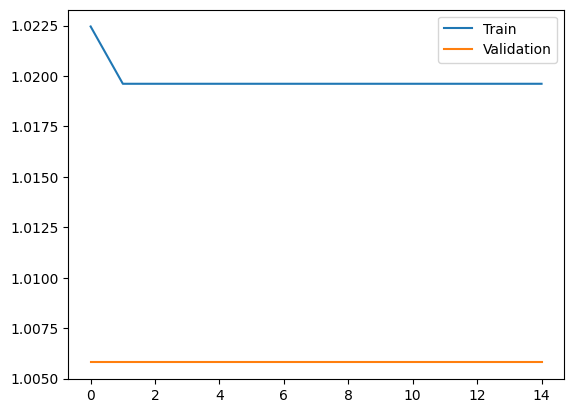

In [98]:
plt.plot(train_losses, label="Train")
plt.plot(validation_losses, label="Validation")
#plt.yscale('log')
plt.legend()